In [1]:
import numpy as np
import matplotlib.pyplot as plt

import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.Environment import Environment
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.NoisyClairvoyant import NoisyClairvoyant
%matplotlib inline

In [2]:
cust_json = "customer_classes.json"
today_customer = 100
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph.json"
arms = settings.prices

environment = Environment(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)

clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm = environment.estimate_clairvoyant()

print("\n", clairvoyant_arms, clairvoyant_reward, exp_c)

loading: [==============================] 99.6%
 [3, 2, 3, 1, 0] 2977.6345603840005 29.776345603840003


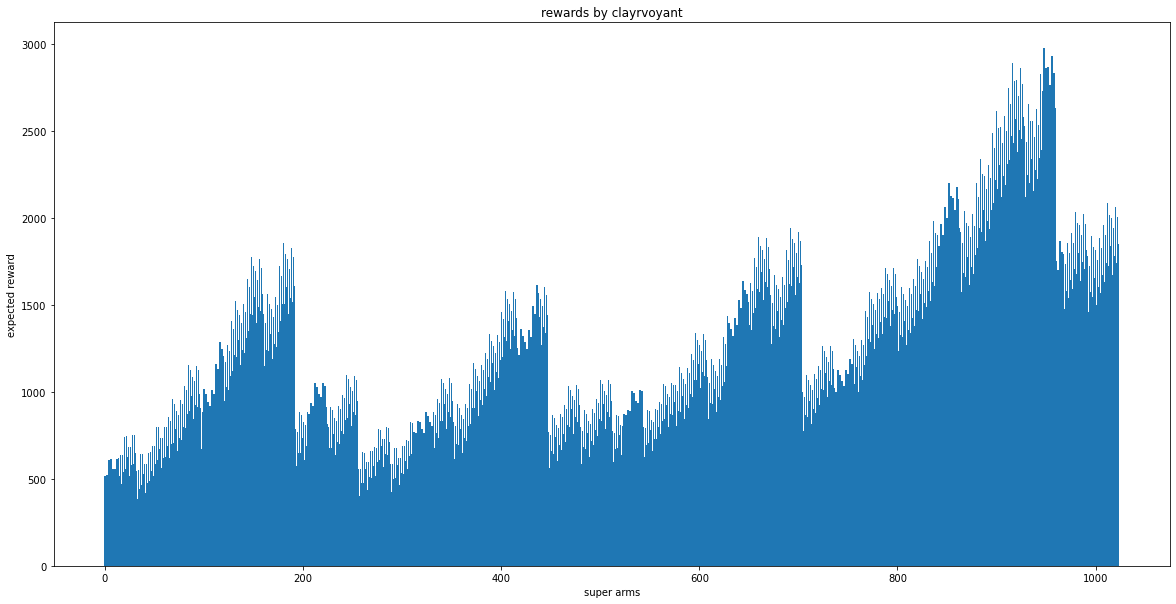

In [3]:
arms2 = list(rew_per_arm.keys())
indexes = []
for i, a in enumerate(arms2):
    indexes.append(i)
rewards = list(rew_per_arm.values())

plt.figure(figsize=(20,10))
plt.bar(indexes, rewards, width=1.2)
plt.xlabel("super arms")
plt.ylabel("expected reward")
plt.title("rewards by clayrvoyant")
plt.show()

In [4]:
n_arms = 4
n_products = 5

TIME_HORIZON = 300
NUM_ITERATION = 1

In [5]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    gr_learner = GreedyLearner(n_arms, n_products, environment.customers, graph_json, arms, environment.customers_distribution)

    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
            
        super_arm = gr_learner.select_superarm()
        report = environment.round(super_arm)
        gr_learner.update(super_arm.copy(), report)
        prices = [arms[p][a] for p, a in enumerate(super_arm)]
        
        
    rewards = gr_learner.get_rewards()
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

loading: [============================= ] 96.7%

(1, 300)

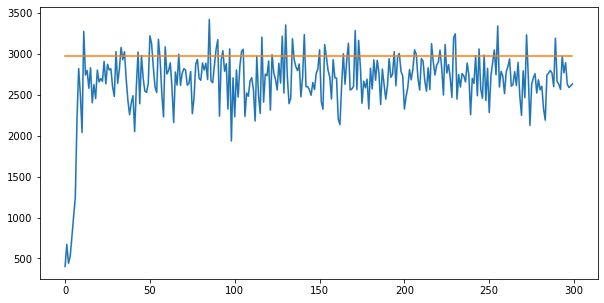

In [6]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)
plt.plot(range(len(rewards)), [clairvoyant_reward] * len(rewards))
plt.show()